In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
new = list(lat_lngs)
print(new)

[(-0.051940547589850894, -135.97039471816686), (-26.863755621839665, -106.08147898500341), (-2.0722714797453676, 10.918024006399122), (77.8682286587497, 143.16589463325914), (-42.570836795846866, -159.85813404591542), (64.04555487463136, 145.4787829330295), (-59.11454936772551, 37.72683991786852), (42.9418358785062, -91.54514218441506), (-77.12698486065656, -83.5442182377465), (-3.2282552317214197, 121.76221947788775), (29.816327871175133, -57.69960456840296), (-34.68300335429806, -111.24141230492863), (81.89496528205598, 38.80625071876494), (23.65776238945257, 138.10765032120452), (26.503091841842632, -173.5245675508301), (2.7278137963886024, -101.00367448297361), (-42.95211165013038, -148.1751459086824), (31.4949350111972, -73.5242106688832), (66.44359956922634, -20.629913038580383), (49.55081510415212, 82.06831810807421), (-60.6855608036233, 163.2094763247688), (-28.455422291932464, -52.629935304907505), (-26.476047286139192, 42.25401892403758), (11.340719471922071, 161.321655111044

In [10]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in new:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [11]:
cities

['atuona',
 'rikitea',
 'mouila',
 'chokurdakh',
 'avarua',
 'artyk',
 'port alfred',
 'marion',
 'ushuaia',
 'kendari',
 'saint george',
 'tumannyy',
 'naze',
 'kapaa',
 'puerto ayora',
 'mataura',
 'havelock',
 'skagastrond',
 'glubokoe',
 'bluff',
 'nao-me-toque',
 'ampanihy',
 'butaritari',
 'toccoa',
 'albany',
 'okato',
 'cape town',
 'bredasdorp',
 'punta arenas',
 'pisco',
 'tabora',
 'qaanaaq',
 'san policarpo',
 'qaqortoq',
 'hobart',
 'launceston',
 'tres arroyos',
 'meyungs',
 'heilbron',
 'constitucion',
 'askiz',
 'hermanus',
 'new norfolk',
 'arraial do cabo',
 'port lincoln',
 'barentsburg',
 'tomatlan',
 'east london',
 'vaini',
 'halalo',
 'alotau',
 'zabol',
 'poya',
 'sao filipe',
 'luderitz',
 'taolanaro',
 'ribeira grande',
 'saint-philippe',
 'barrow',
 'dunedin',
 'dikson',
 'skjervoy',
 'ilulissat',
 'alofi',
 'watsa',
 'sembakung',
 'itoman',
 'vaitape',
 'bambous virieux',
 'hofn',
 'maceio',
 'ayer itam',
 'provideniya',
 'mongu',
 'carnarvon',
 'college',
 

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mouila
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | artyk
City not found. Skipping...
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | marion
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kendari
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | havelock
Processing Record 18 of Set 1 | skagastrond
City not found. Skipping...
Processing Record 19 of Set 1 | glubokoe
City not found. Skipping...
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Se

Processing Record 35 of Set 4 | los llanos de aridane
Processing Record 36 of Set 4 | alice springs
Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | chudovo
Processing Record 40 of Set 4 | ingham
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | mana
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | santa rosa
Processing Record 46 of Set 4 | dafeng
Processing Record 47 of Set 4 | antsohihy
Processing Record 48 of Set 4 | waingapu
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | nikita
Processing Record 1 of Set 5 | port hueneme
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | sobolevo
Processing Record 4 of Set 5 | midyat
Processing Record 5 of Set 5 | sur
Processing Record 6 of Set 5 | nisia floresta
Processing Record 7 of Set 5 | sechura
Processing Record 8 of Set 5 | brae
Processi

Processing Record 28 of Set 8 | santa luzia
Processing Record 29 of Set 8 | kismayo
Processing Record 30 of Set 8 | cap malheureux
Processing Record 31 of Set 8 | ust-omchug
Processing Record 32 of Set 8 | puerto escondido
Processing Record 33 of Set 8 | oussouye
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | arman
Processing Record 36 of Set 8 | umm kaddadah
Processing Record 37 of Set 8 | newark
Processing Record 38 of Set 8 | kangaatsiaq
Processing Record 39 of Set 8 | bereda
Processing Record 40 of Set 8 | olopa
Processing Record 41 of Set 8 | kiunga
Processing Record 42 of Set 8 | umm lajj
Processing Record 43 of Set 8 | fatehabad
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | okmulgee
Processing Record 47 of Set 8 | scarborough
Processing Record 48 of Set 8 | sile
Processing Record 49 of Set 8 | codrington
Processing Record 50 of Set 8 | lodja
Processing Re

Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | rae bareli
Processing Record 20 of Set 12 | usevya
Processing Record 21 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 22 of Set 12 | bossier city
Processing Record 23 of Set 12 | burkhala
City not found. Skipping...
Processing Record 24 of Set 12 | noumea
Processing Record 25 of Set 12 | uige
Processing Record 26 of Set 12 | coquimbo
Processing Record 27 of Set 12 | bonavista
Processing Record 28 of Set 12 | sistranda
Processing Record 29 of Set 12 | montecristo
Processing Record 30 of Set 12 | nyurba
Processing Record 31 of Set 12 | bogo
Processing Record 32 of Set 12 | palembang
Processing Record 33 of Set 12 | bengkulu
Processing Record 34 of Set 12 | maniitsoq
Processing Record 35 of Set 12 | vallenar
Processing Record 36 of Set 12 | praia da vitoria
Processing Record 37 of Set 12 | ambilobe
Processing Record 38 of Set 12 | nantucket
Processing Record 39 of Set 12 | sisimiut
Process

In [16]:
print(len(city_data))

562


In [17]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.10,78,64,17.36,PF,2022-02-02 17:22:44
1,Rikitea,-23.1203,-134.9692,77.29,75,57,6.35,PF,2022-02-02 17:21:42
2,Mouila,-1.8685,11.0559,78.26,85,75,4.07,GA,2022-02-02 17:22:45
3,Chokurdakh,70.6333,147.9167,-17.09,99,71,7.47,RU,2022-02-02 17:20:44
4,Avarua,-21.2078,-159.7750,78.85,89,75,14.97,CK,2022-02-02 17:22:45
...,...,...,...,...,...,...,...,...,...
557,Esperance,-33.8667,121.9000,57.04,72,0,13.31,AU,2022-02-02 17:36:49
558,Ofunato,39.0717,141.7167,31.14,61,19,15.77,JP,2022-02-02 17:36:49
559,Alugan,12.2188,125.4808,78.42,85,100,13.60,PH,2022-02-02 17:36:49
560,Gushikawa,26.3544,127.8686,69.03,95,75,3.44,JP,2022-02-02 17:36:50


In [19]:
new_data_column = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_data_column]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-02-02 17:22:44,-9.8000,-139.0333,78.10,78,64,17.36
1,Rikitea,PF,2022-02-02 17:21:42,-23.1203,-134.9692,77.29,75,57,6.35
2,Mouila,GA,2022-02-02 17:22:45,-1.8685,11.0559,78.26,85,75,4.07
3,Chokurdakh,RU,2022-02-02 17:20:44,70.6333,147.9167,-17.09,99,71,7.47
4,Avarua,CK,2022-02-02 17:22:45,-21.2078,-159.7750,78.85,89,75,14.97
...,...,...,...,...,...,...,...,...,...
557,Esperance,AU,2022-02-02 17:36:49,-33.8667,121.9000,57.04,72,0,13.31
558,Ofunato,JP,2022-02-02 17:36:49,39.0717,141.7167,31.14,61,19,15.77
559,Alugan,PH,2022-02-02 17:36:49,12.2188,125.4808,78.42,85,100,13.60
560,Gushikawa,JP,2022-02-02 17:36:50,26.3544,127.8686,69.03,95,75,3.44


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
#import cvs again in order not to run random generator and api key
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Atuona,PF,2022-02-02 17:22:44,-9.8000,-139.0333,78.10,78,64,17.36
1,1,Rikitea,PF,2022-02-02 17:21:42,-23.1203,-134.9692,77.29,75,57,6.35
2,2,Mouila,GA,2022-02-02 17:22:45,-1.8685,11.0559,78.26,85,75,4.07
3,3,Chokurdakh,RU,2022-02-02 17:20:44,70.6333,147.9167,-17.09,99,71,7.47
4,4,Avarua,CK,2022-02-02 17:22:45,-21.2078,-159.7750,78.85,89,75,14.97
...,...,...,...,...,...,...,...,...,...,...
557,557,Esperance,AU,2022-02-02 17:36:49,-33.8667,121.9000,57.04,72,0,13.31
558,558,Ofunato,JP,2022-02-02 17:36:49,39.0717,141.7167,31.14,61,19,15.77
559,559,Alugan,PH,2022-02-02 17:36:49,12.2188,125.4808,78.42,85,100,13.60
560,560,Gushikawa,JP,2022-02-02 17:36:50,26.3544,127.8686,69.03,95,75,3.44


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Get today's date in seconds.
today = time.time()
today

1643855227.3654766

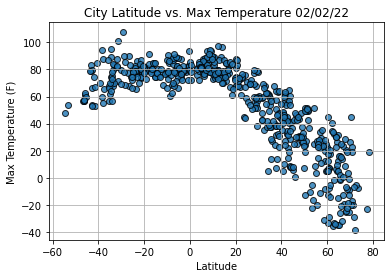

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

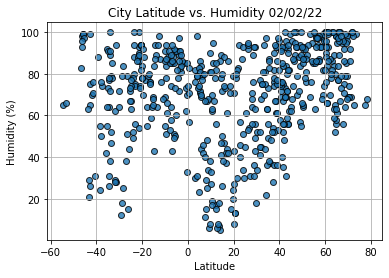

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

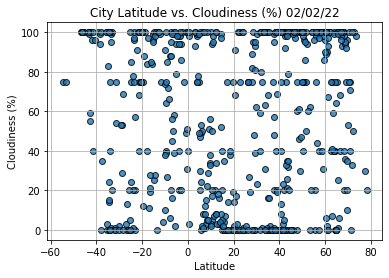

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

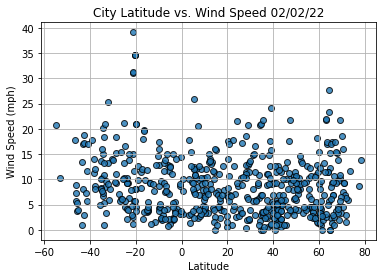

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Mataura
Country                        NZ
Date          2022-02-02 17:22:46
Lat                      -46.1927
Lng                      168.8643
Max Temp                    56.48
Humidity                       98
Cloudiness                    100
Wind Speed                   5.79
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Chokurdakh,RU,2022-02-02 17:20:44,70.6333,147.9167,-17.09,99,71,7.47
6,6,Marion,US,2022-02-02 17:18:40,39.7684,-86.1555,44.92,96,100,6.91
9,9,Saint George,US,2022-02-02 17:21:01,37.1041,-113.5841,39.67,28,75,4.00
10,10,Naze,JP,2022-02-02 17:22:46,28.3667,129.4833,55.92,89,100,18.66
11,11,Kapaa,US,2022-02-02 17:22:46,22.0752,-159.3190,67.12,83,100,1.01


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

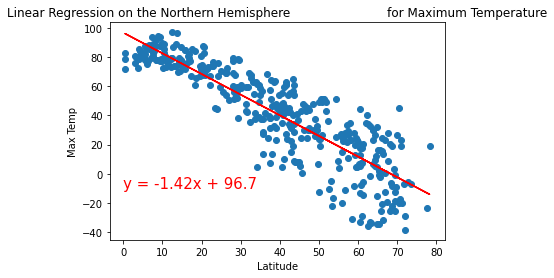

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-10))

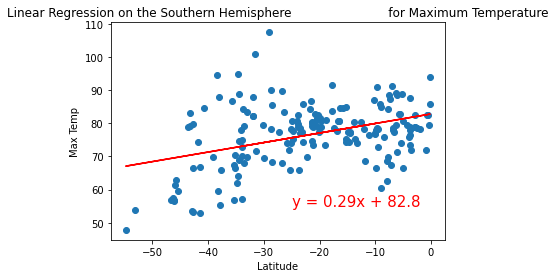

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,55))

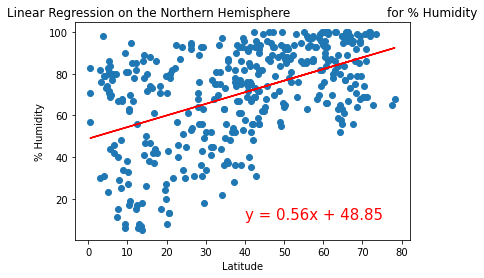

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

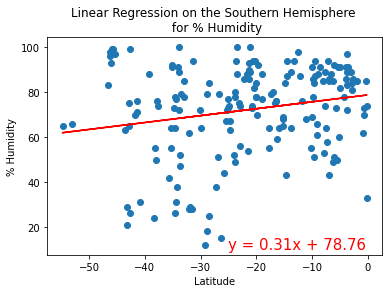

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,10))

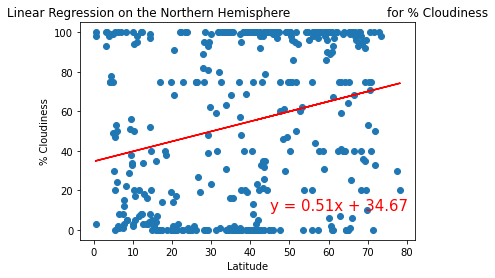

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,10))

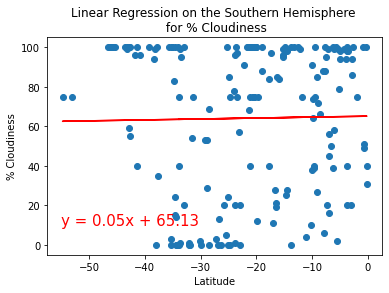

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,10))

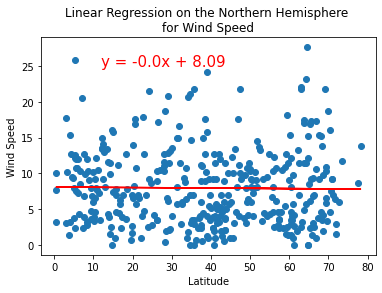

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(12,25))

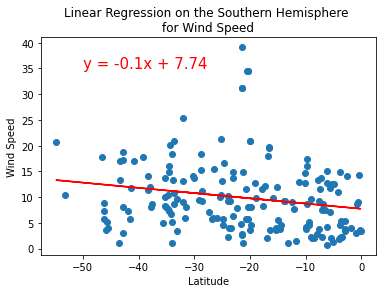

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))